In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### uni-variate analysis

In [22]:
data.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<AxesSubplot: >

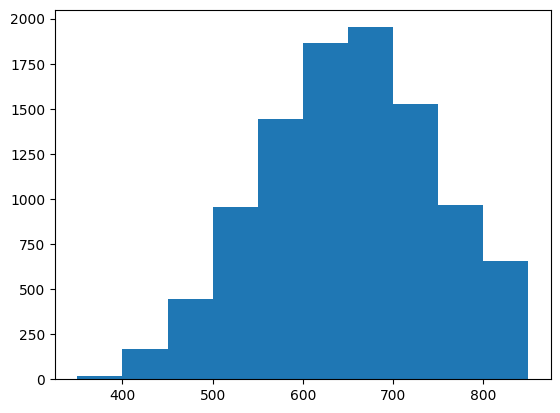

In [23]:
data.CreditScore.hist(grid = False)

### bi-variant analysis

<AxesSubplot: xlabel='Age', ylabel='Balance'>

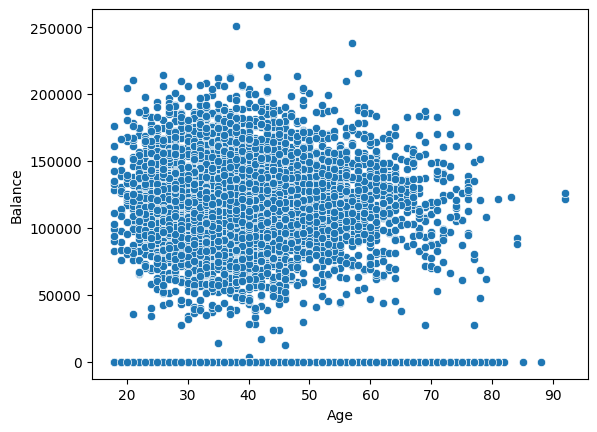

In [24]:
sns.scatterplot(data, x = "Age", y = "Balance")

### multi-variant analysis

C:\Users\vpra\AppData\Local\Temp\ipykernel_13976\3784163891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(data.corr())


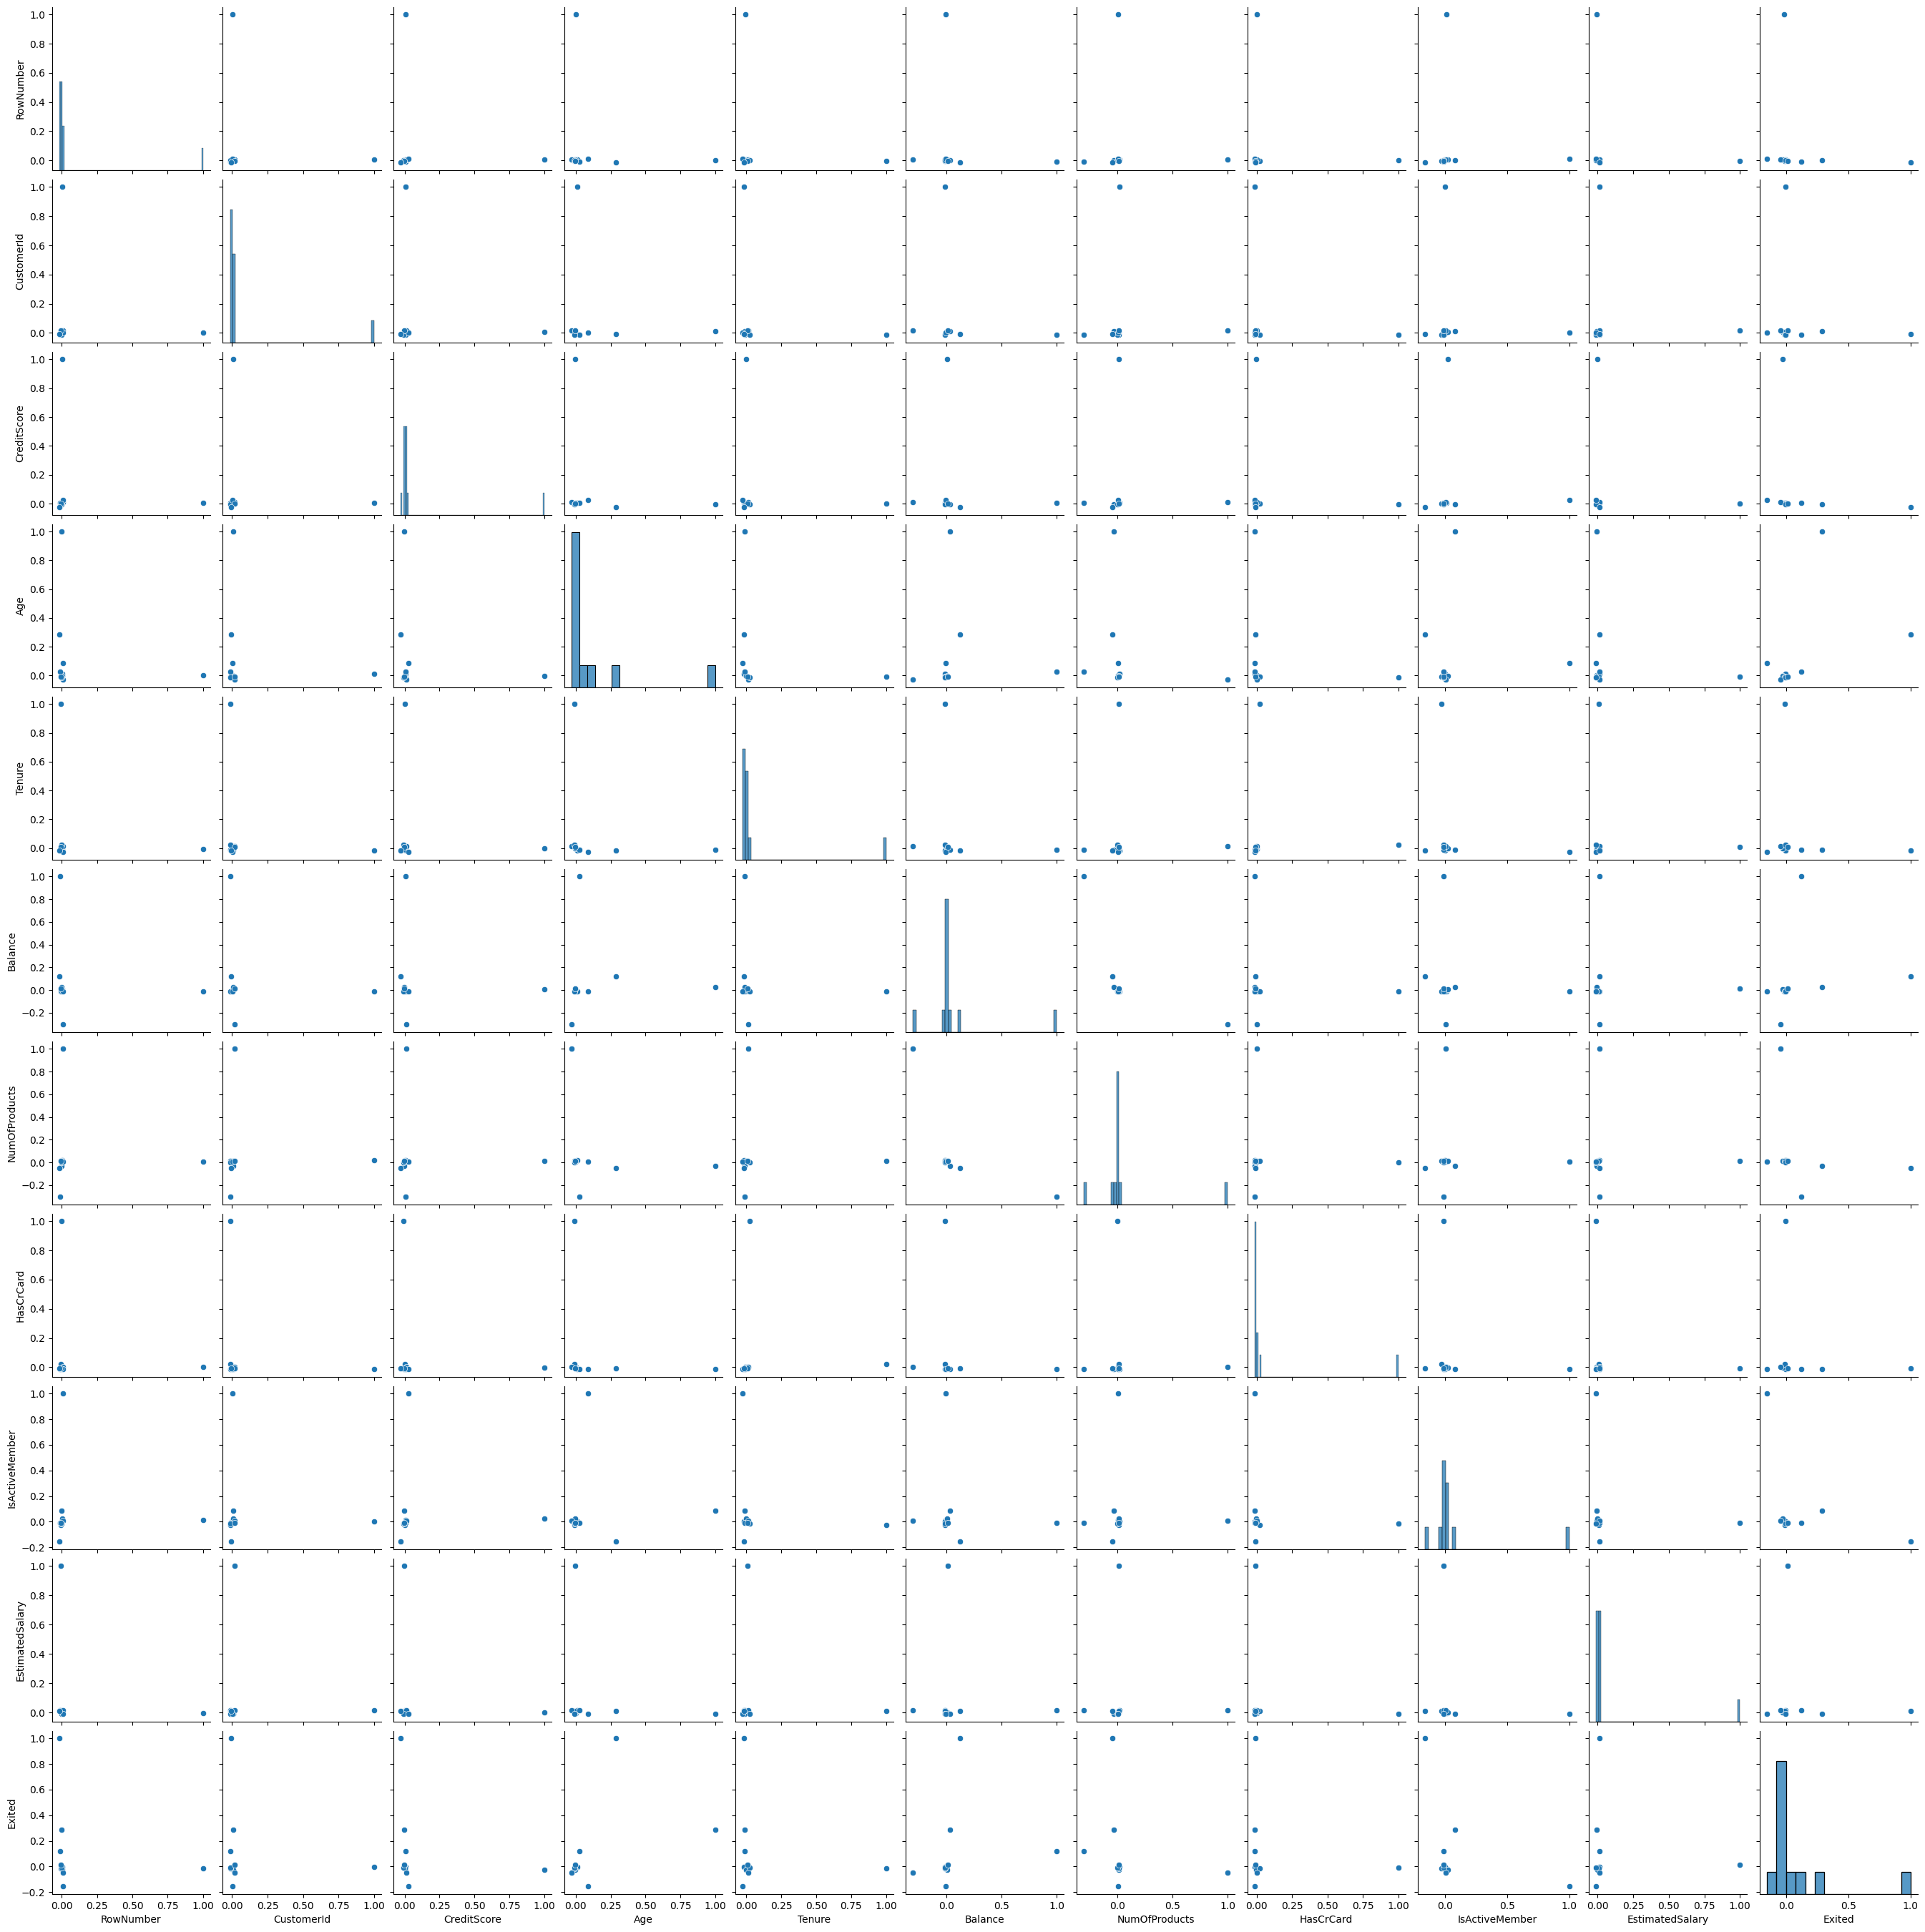

In [25]:
sns.pairplot(data.corr())

### description

In [26]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### missing values

In [27]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### outliars

<AxesSubplot: ylabel='Frequency'>

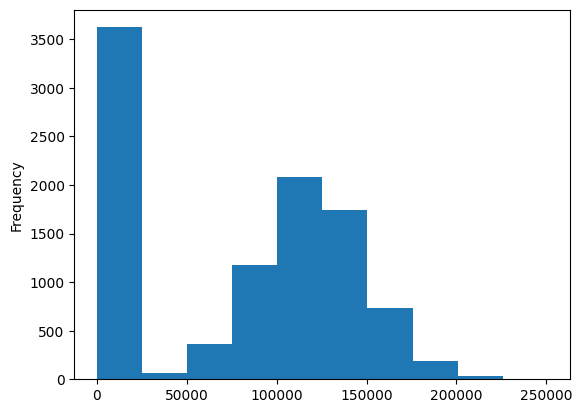

In [28]:
col = "Balance"
data.loc[:, col].plot(kind = "hist")

In [29]:
data = data.loc[data.Balance > 50000]

### dependant and independant variables

In [30]:
data = pd.get_dummies(data, drop_first = True)
x = data.drop("Exited", axis = 1)
y = data.Exited

### split data into train and test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
train = pd.concat([x_train, y_train], axis = 1)
test = pd.concat([x_test, y_test], axis = 1)
list(map(lambda x:x.shape, [train, test]))

[(4731, 2299), (1577, 2299)]